# STAT 201 Group Project Proposal

In [1]:
# Dependencies
library(ggplot2)
library(dplyr)
library(tidyverse)
library(repr)
library(tidyr)
library(tidymodels)
library(readxl)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ r

### Introduction

The topic of our investigation focuses on determining whether there is a significant productivity difference between in-office jobs and remote jobs. In simpler terms, we want to find out if people who work in an office are paid differently than those who work remotely. We also cite a correlation between salary and productivity to justify these claims. The data for this project was obtained from https://ai-jobs.net/salaries/download. We assume that the data was collected randomly and in an unbiased manner.

The name of the dataset is Data jobs salaries and it contains the salary information of 8225 professionals, along with factors including:<br>1. Work year <br>2. Experience level <br>3. Employment type <br>4. Job title <br>5. Salary in USD <br>6. Employee Residence <br>7. Company location <br>8. Remote ratio


We would like to investigate whether there a difference in salary between professionals working remotely (remote_ratio == 100) and those working in a traditional office setting (remote_ratio == 0)? To answer this question, we would like to use two parameters mean and standard deviation. We ask the following questions:

1) Is there a difference in the **mean** salary (in USD) of remote and in-person (office) employees from the salaries dataset. 
2) Is there a difference in the in the **standard deviation** of salary (in USD) of remote and in-person (office) employees.

### Preliminary Results

We first load the dataset into R

In [2]:
# Read dataset from CSV format
salaries = read.csv('data/salaries.csv')
head(salaries)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2023,SE,FT,ML Engineer,170000,AUD,114979,AU,100,AU,L
2,2023,SE,FT,Data Scientist,287500,USD,287500,US,0,US,M
3,2023,SE,FT,Data Scientist,168000,USD,168000,US,0,US,M
4,2023,SE,FT,Data Engineer,155000,USD,155000,US,0,US,M
5,2023,SE,FT,Data Engineer,140000,USD,140000,US,0,US,M
6,2023,EX,FT,Data Lead,230000,USD,230000,US,0,US,M


First, we read and tidy the data set. We only select the relevant columns, and filter the currency for USD, so that we can make comparisons in salaries. 

In [3]:
# Clean and tidy dataset
# 1. Filter dataset such that remote_ratio is either 0 or 100
salaries_filtered <- salaries %>%
    filter(remote_ratio == 0 | remote_ratio == 100, !is.na(remote_ratio), !is.na(salary), 
           salary_currency == "USD") |>
    select(remote_ratio, salary_in_usd)

#Change column names
colnames(salaries_filtered) <- c("job_type", "salary_in_USD")
 
salaries_job_type <-  salaries_filtered |>
                       mutate(job_type = case_when(job_type == 100 ~ "Remote",
                              job_type == 0 ~ "In-Person")) |>
                              mutate(job_type = as_factor(job_type))
head(salaries_job_type)
                              

,job_type,salary_in_USD
,<fct>,<int>
1,In-Person,287500
2,In-Person,168000
3,In-Person,155000
4,In-Person,140000
5,In-Person,230000
6,In-Person,180000


Let us see the proportion of in person and office employes

In [4]:
salaries_job_type |> group_by(job_type) |>
                     summarise(n = n())

job_type,n
<fct>,<int>
In-Person,4523
Remote,2853


We have a fairly large sample size for both in perspon and remote employees. Now we compute estimates of the parameters identified above  (i.e median salary (USD)) and standard deviation.

In [5]:

# Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
salary_estimates <- salaries_job_type %>%
  group_by(job_type) %>%
  summarize(
    salary_mean = mean(salary_in_USD, na.rm = TRUE),
    salary_sd = sd(salary_in_USD, na.rm = TRUE)
  )

head(salary_estimates)

job_type,salary_mean,salary_sd
<fct>,<dbl>,<dbl>
In-Person,161234.1,61344.83
Remote,152104.2,57102.94


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


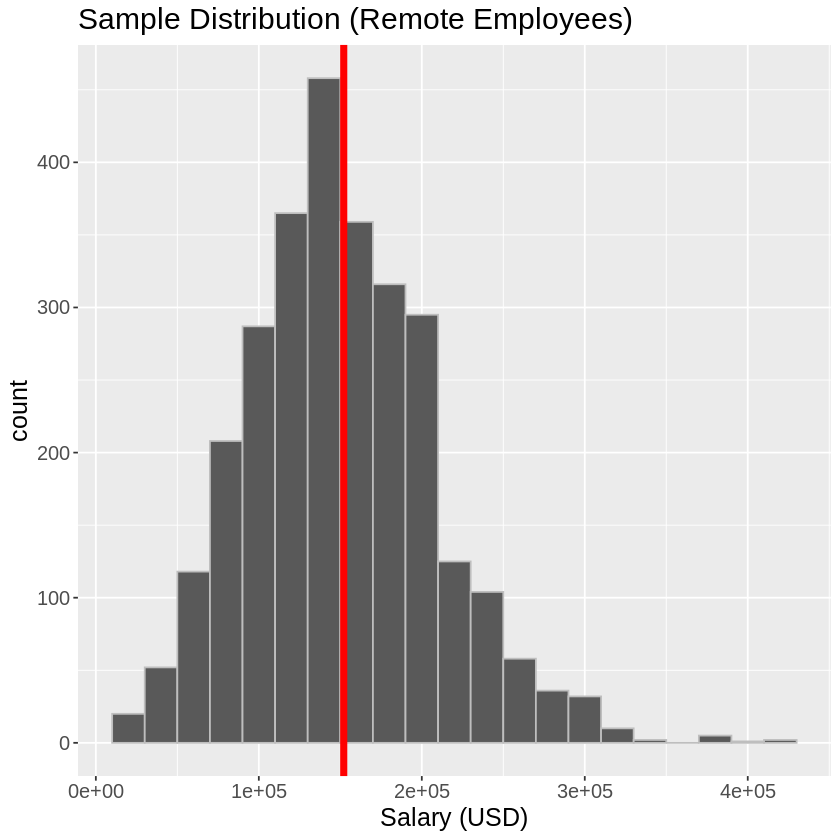

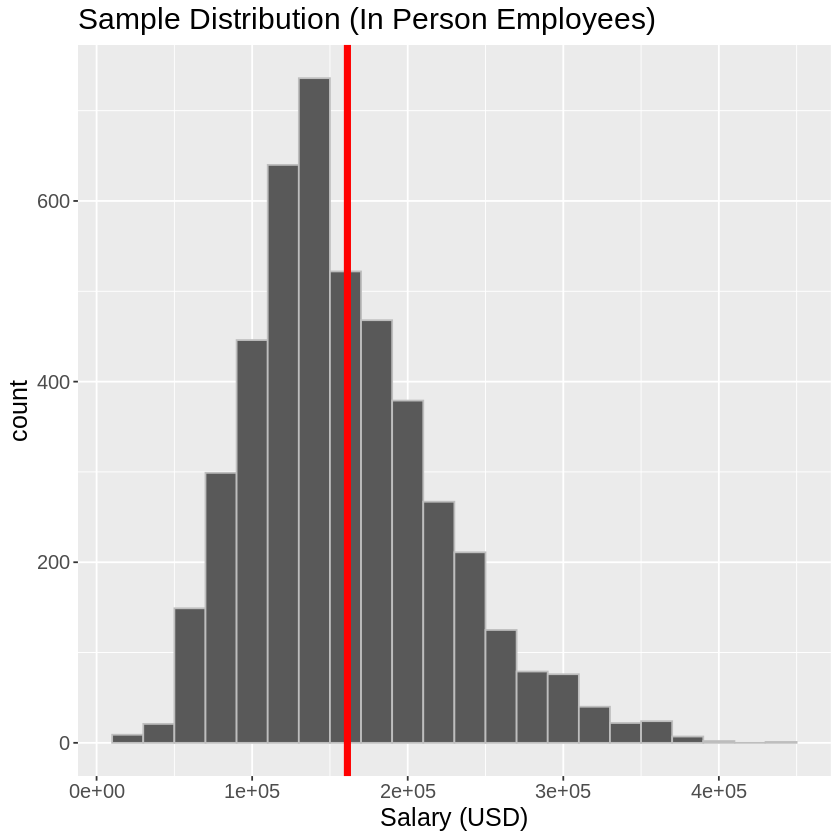

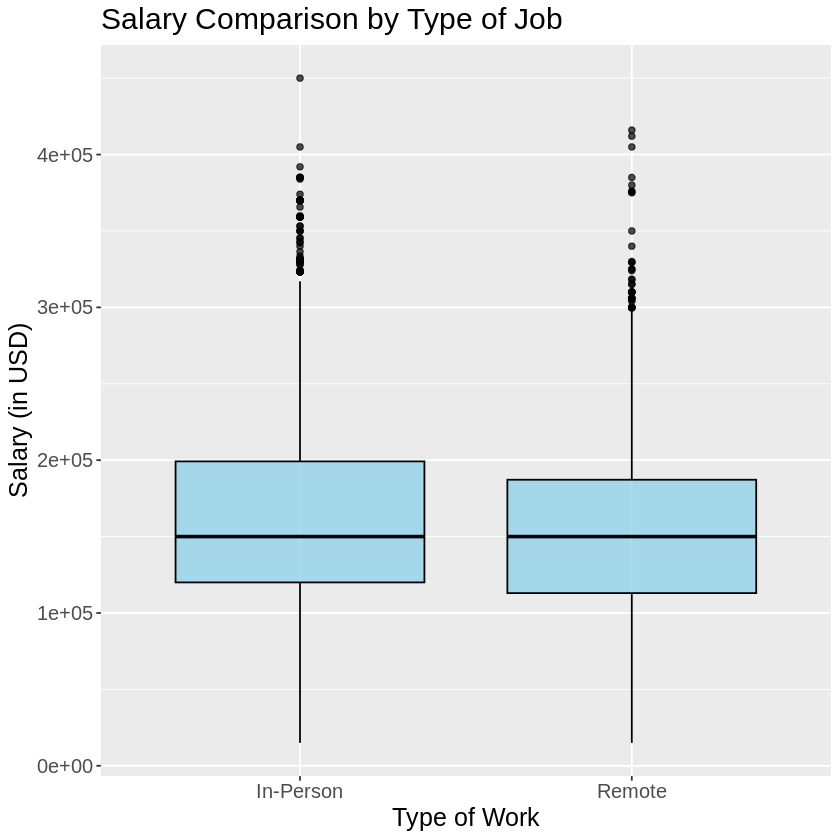

In [6]:
# Plot the relevant raw data, tailoring your plot in a way that addresses your question

salaries_remote <- salaries_job_type |>
                   filter(job_type == "Remote")

salaries_inperson<- salaries_job_type |>
                   filter(job_type == "In-Person")

salaries_boxplot <- ggplot(salaries_job_type, aes(x = as.factor(job_type), y = salary_in_USD)) +
  geom_boxplot(fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Salary Comparison by Type of Job", x = "Type of Work", y = "Salary (in USD)", color = "Mean") + 
  theme(text = element_text(size = 15))

salaries_remote <- ggplot(salaries_remote, aes(x = salary_in_USD)) +
                   geom_histogram(binwidth = 20000, color = "grey") + 
                   xlab("Salary (USD)") +
                   ggtitle("Sample Distribution (Remote Employees)") +
                   theme(text = element_text(size = 15))+
                   geom_vline(xintercept = salary_estimates$salary_mean[2], size = 2, color = "red")
                              
salaries_inperson<- ggplot(salaries_inperson, aes(x = salary_in_USD)) +
                    geom_histogram(binwidth = 20000, color = "grey") + 
                    xlab("Salary (USD)") +
                    ggtitle("Sample Distribution (In Person Employees)") +
                    theme(text = element_text(size = 15))+
                    geom_vline(xintercept = salary_estimates$salary_mean[1], size = 2, color = "red")

salaries_remote
salaries_inperson
salaries_boxplot

### Methods

The estimates themselves are not enough to answer our question because the difference in mean salaries and standard deviation of salaries could be purely due to sampling variations. Additionally, the boxplot visually represents the distribution of salaries across employees working remotely and in-office, but lacks the statistical evidence to draw any meaningful conclusions. 

We try to address this by conducting a thorough investigation using hypothesis tests and confidence intervals. 

Hypothesis test for difference of means


$\mu_1$ = The mean salary for 100% remote employees <br>
$\mu_2$ = The mean salary for in-office employees 



We will test

$H_0$: There is no difference in the mean salary of 100% remote and in-office employees

$H_1$ : There is a difference in the mean salary of 100% remote and in-office employees

$$ H_0:  \mu_1 - \mu_2 = 0$$
$$H_1:  \mu_1 - \mu_2 \ne 0$$

Formula for Calculating test statistic:

$$
t = \frac{(\bar{x}_1 - \bar{x}_2) - \Delta_0}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$


$s_p$ is the pooled variance.


$$
s_p = \sqrt{\frac{(n_1 - 1) \cdot s_1^2 + (n_2 - 1) \cdot s_2^2}{n_1 + n_2 - 2}}
$$

Hypothesis test for difference of sd

$H_0$: There is no difference in the sd of salary of 100% remote and in-office employees

$H_1$ : There is a difference in the sd of salary of 100% remote and in-office employees

It would also be interesting to compare the standard deviation of the salaries of the two groups. 

$$ H_0:  \sigma_1 - \sigma_2 = 0$$
$$H_1:  \sigma_1 - \sigma_2 \ne 0$$



Confidence Intervals: We also plan to create bootstrap distribution of difference of means by sampling with replacement from our sample. Then we will create 95% confidence intervals to visualise the results and compare them to the hypothesis test. We will do the same for our scale parameter (i.e standard deviation)

We expect to find a definitive conclusion as to whether there is a significant difference in salaries of employees who work remotely when compared to the salaries of employees who work in person.


Nowadays, remote jobs have been on the rise ever since the covid-19 pandemic occurred. Transitioning to remote work would offer both numerous benefits for companies such as an increase in productivity in employees as it promotes flexibility which enables employees to work in an environment that suits their individual needs and preferences.(Yuliati et al., 2023)

The findings from our project can reveal disparities in the workspace and guide businesses to address these disparities and it could equip employees  with necessary information while negotiating hybrid or remote work arrangements. 


Future questions: <br>
1. Given a general increase in productivity levels, should companies offer more remote jobs to their employees? <br>
2. Are there specific jobs that have more benefits when working in a remote setup? <br>
3. How does the adaptation of remote work affect physical work spaces in the long term? <br>
4. How does the job satisfaction of remote workers compare to traditional office workers? How does this vary across different industries? 

### References

Yuliati, L., Smith, P. A. W., &amp; Prasetyaningtyas, S. W. (2023). The influence of flexible working hours, work from home, work stress, and salary on employee performance at PT Armada auto tara during COVID-19 pandemic. Quantitative Economics and Management Studies, 4(3), 402–413. https://doi.org/10.35877/454ri.qems1619 

Barrero, J. M. (2022). WFH research updates: December 2022. Marketing, Automation &amp; Email Platform. https://mailchi.mp/d00d2c93d7bc/wfh-research-updates-december-2022 